In [1]:
# Imports
import math
import time
import numpy as np
import matplotlib.pyplot as plt

# Functions to compute the *n*th Fibonacci number.

In [2]:
# Recursive algorithm for finding the nth Fibonacci number.
def nth_fib1(n):
    if n == 0:
        return 0
    elif n == 1:
        return 1
    else:
        return nth_fib1(n-2) + nth_fib2(n-1)

In [7]:
# An improved algorithm to find the nth Fibonacci number.
def nth_fib2(n):
    if n == 0:
        return 0
    elif n == 1:
        return 1
    else:
        fib = [0, 1]
        for i in range(n - 1):
            fib.append(fib[0] + fib[1])
            fib.pop(0)
        return fib[-1]


#def nth_fib2(n):
#    fib = [0, 1]
#    if n == 0:
#        return 0
#    elif n == 1:
#        return 1
#    else:
#        for i in range(n - 1):
#            fib.append(fib[-1] + fib[-2])
#        return fib[-1]

In [4]:
# Algorithm to find the nth Fibonacci number using a closed form formula.
def nth_fib3(n):
    phi = (1 + math.sqrt(5)) / 2
    return int((phi**n - (1 - phi)**n) / math.sqrt(5))

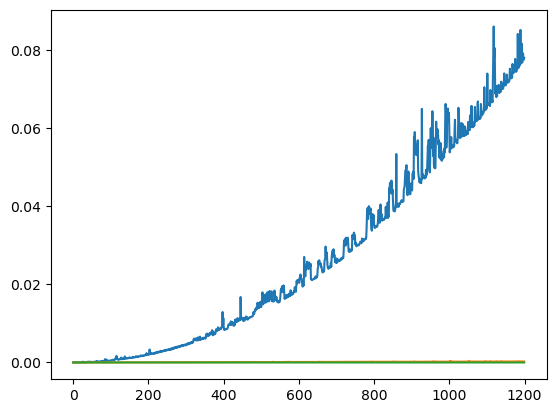

In [21]:
# A comparison of the times for the 2nd and 3rd algorithms

times1 = []
for i in range(1200):
    start = time.time()
    nth_fib1(i)
    end = time.time()
    times1.append(end - start)
    
times2 = []
for i in range(1200):
    start = time.time()
    nth_fib2(i)
    end = time.time()
    times2.append(end - start)
    
times3 = []
for i in range(1200):
    start = time.time()
    nth_fib3(i)
    end = time.time()
    times3.append(end - start)    

plt.plot(times1)
plt.plot(times2)
plt.plot(times3)
plt.show()    

# A closed form formula for the *n*th Fibonacci number.

We prove the formula used in the function "nth_fib3(n)". Our approach will involve expressing powers of the *golden ratio* ($\varphi$) in the form $a + b \varphi$.

We start by noting that, $\varphi$ is the solution to the quadratic equation $x^2 - x - 1 = 0$, so $\varphi^2 = 1 + \varphi$.

We now compute some powers of $\varphi$ using the above.

\begin{align} 
  \varphi^3 &= \varphi^2 \cdot \varphi \\\\ 
  &= (1 + \varphi) \varphi \\\\
  &= \varphi + \varphi^2 \\\\
  &= \varphi + 1 + \varphi \\\\
  &= 1 + 2 \varphi. \\\\
\end{align}

\begin{align}
  \varphi^4 &= \varphi^3 \cdot \varphi \\\\
            &= (1 + 2 \varphi) \varphi \\\\
            &= \varphi + 2 \varphi^2 \\\\
            &= \varphi + 2(1 + \varphi) \\\\
            &= 2 + 3 \varphi
\end{align}

\begin{align}
  \varphi^5 &= \varphi^4 \cdot \varphi \\\\
            &= (2 + 3 \varphi) \varphi \\\\
            &= 2 \varphi + 3 \varphi^2 \\\\
            &= 2 \varphi + 3 (1 + \varphi) \\\
            &= 3 + 5 \varphi
\end{align}

Let's summarize what we just found.

\begin{align}
 \varphi &= 0 + 1 \varphi \\\\
 \varphi^2 &= 1 + 1 \varphi \\\\
 \varphi^3 &= 1 + 2 \varphi \\\\
 \varphi^4 &= 2 + 3 \varphi \\\\
 \varphi^5 &= 3 + 5 \varphi
\end{align}

At this point it is reasonable to make the following conjecture. (Note that $f_n$ refers to the $n$th Fibonacci number.)

$$ \varphi^n = f_{n-1} + f_n \varphi$$

We need *mathematical induction* to prove this result. We start by noting that $\varphi^2 = 1 + \varphi$ and that $f_1 = f_2 = 1$.  (This is called the base case.) We now assume the above claim is true for $n - 1$. (This is called our *inductive hypothesis*.) We will show that the truth of the claim for $n - 1$ implies the truth of the claim for $n$. Then we can compute,

\begin{align}
  \varphi^n &= \varphi^{n - 1} \varphi \\\\
            &= (f_{n - 2} + f_{n - 1} \varphi) \varphi \\\\
            &= f_{n - 2} \varphi + f_{n - 1} \varphi^2 \\\\
            &= f_{n - 2} \varphi + f_{n - 1} (1 + \varphi) \\\\
            &= f_{n - 1} + (f_{n - 2} + f_{n - 1}) \varphi \\\\
            &= f_{n - 1} + f_n \varphi
\end{align}

What does this all mean? We have shown that if the formula for $\varphi^{n-1}$ is true, then it must also be true for $\varphi^n$. We explicitly showed it is true for $n = 2$. Since it is true for $n = 2$, it must be true for $n =  3$. Since it is true for $n = 3$, it must be true for $n = 4$. Therefore the formula is true for any positive integer $n$.

This formula allows us to find a closed form formula for the $n$th Fibonacci number. Note that $\phi = \frac{1 - \sqrt{5}}{2}$ also solves the equation $x^2 - x - 1$ = 0 and therefore also satisfies the formula $\phi^n = f_{n - 1} + f_n \phi$. Then,

\begin{align}
  \varphi^n &= f_{n - 1} + f_n \varphi \\\\
  \phi^n &= f_{n - 1} + f_n \phi \\\\
\end{align}

Subtract the bottom equation from the top.

$$\varphi^n - \phi^n = f_n (\varphi - \phi)$$

Therefore $f_n = \frac{\varphi^n - \phi^n}{\varphi - \phi}$ which can be simplified as follows.

$$f_n = \frac{\varphi^n - \phi^n}{\sqrt{5}}$$

In [6]:
list = [5, 4, 3]
list.pop(0)
list

[4, 3]